# Centrifugal Pump (CP)
March 9th, 2025
Data analysis by Alex Quemel, Rahil Shaik, Sneha Kancharla, and Ethan Mibu

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import linregress
import math
import warnings
warnings.filterwarnings('ignore')

### Reading in Data from .csv

In [113]:
df = pd.read_csv("MW1-Centrifugal Pump Lab Raw Data - Sheet1.csv")

In [114]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000


### Pre-Processing

Converting our flow rate to a volumetric flow rate in m^3 / sec:

$$ \text{flow rate in } \frac{\text{gallon}}{\text{min}} = \frac{6.309 \times 10^-5 \text{cubic meters}}{\text{gallon}} \times \frac{\text{1 min}}{\text{60 sec}}$$

In [115]:
df["volumetric_flowrate"] = df["flowrate"] * 6.309 * 10 ** -5 * (1 / 60) # m^3/s

converting inches to meters

$$ 39.37 \ \text{in} = 1 \ \text{m}$$

In [116]:
df["impeller_diam_meters"] = df["impeller_diam"] * (1/39.37)

In [117]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate,volumetric_flowrate,impeller_diam_meters
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000,2.260725e-05,0.088900
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000,1.997850e-05,0.088900
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000,1.787550e-05,0.088900
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000,1.104075e-05,0.088900
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014,1.472100e-09,0.088900
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000,2.944200e-05,0.114300
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000,2.733900e-05,0.114300
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500,2.181863e-05,0.114300
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000,1.524675e-05,0.114300
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000,1.051500e-06,0.114300


## Analysis Question 1
$$ \textbf {For one impeller, plot head versus capacity with rotational speed as a parameter (See
references for determining head and capacity.)} $$

To start this question, we need to compute pump head for an impeller. Let's start with the 3.5 inch diameter impeller. 

The pump head is defined as the "height which the pump will lift fluid at a given flow rate" (Noel de Nevers, 3) which we can equate by
 
$$ h = \frac{P_{4} - P_{1}}{\rho * g} $$ 

(Noel de Nevers, eqn 10.20) 

We will define P_4 as the pump discharge pressure and P_1 as the pump suction pressure.

In [118]:
rho = 997 # kg/m^3
g = 9.81 # m/s^2

In [119]:
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

Now let's plot this pump head against capacity which we know is the same as head-flowrate (McCabe-Smith, 202)

In [120]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate,volumetric_flowrate,impeller_diam_meters,pump_head
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000,2.260725e-05,0.088900,0.000429
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000,1.997850e-05,0.088900,0.000337
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000,1.787550e-05,0.088900,0.000220
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000,1.104075e-05,0.088900,0.000153
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014,1.472100e-09,0.088900,0.000092
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000,2.944200e-05,0.114300,0.000593
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000,2.733900e-05,0.114300,0.000481
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500,2.181863e-05,0.114300,0.000337
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000,1.524675e-05,0.114300,0.000164
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000,1.051500e-06,0.114300,0.000143


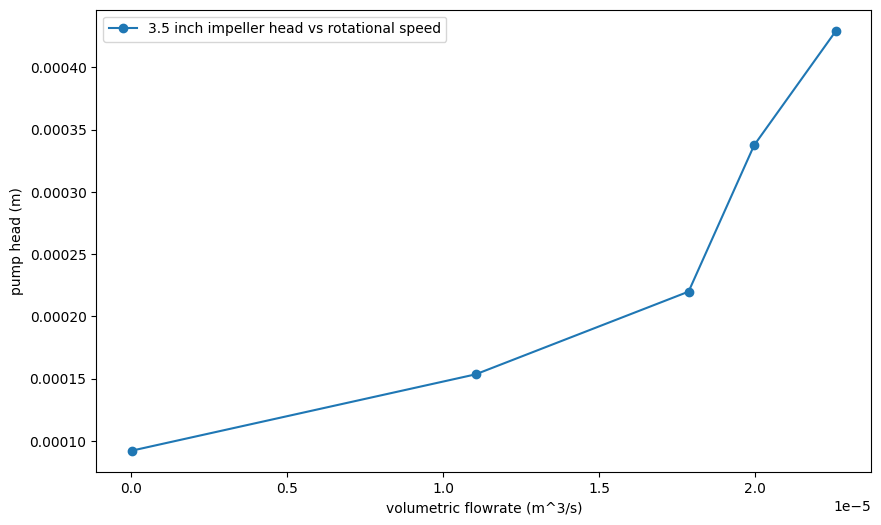

In [121]:
df_small = df.query("impeller_diam == 3.500")

plt.figure(figsize=(10,6))
plt.plot(df_small["volumetric_flowrate"], df_small["pump_head"], marker="o", label="3.5 inch impeller head vs rotational speed")
plt.xlabel("volumetric flowrate (m^3/s)")
plt.ylabel("pump head (m)")
plt.legend()

Let's plot the rest of the impeller sizes to ensure that this is the correct shape we should be looking for

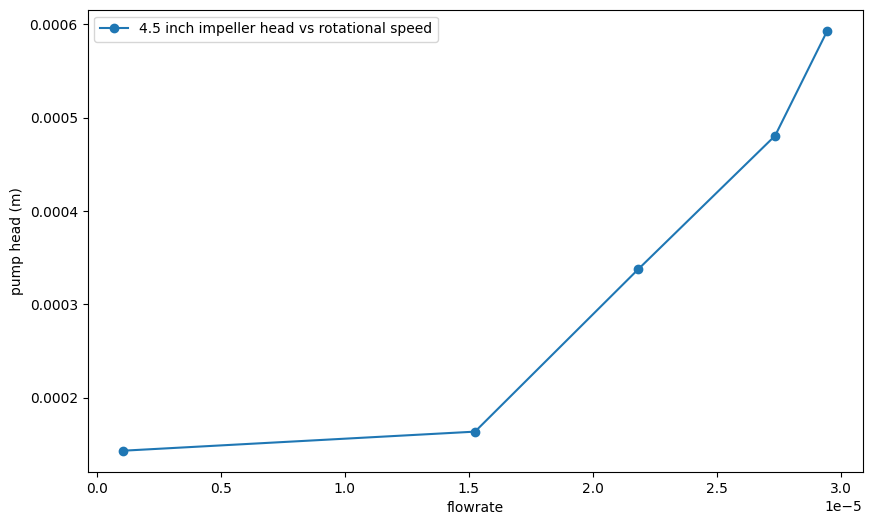

In [122]:
df_med = df.query("impeller_diam == 4.500")

plt.figure(figsize=(10,6))
plt.plot(df_med["volumetric_flowrate"], df_med["pump_head"], marker="o", label="4.5 inch impeller head vs rotational speed")
plt.xlabel("flowrate")
plt.ylabel("pump head (m)")
plt.legend()

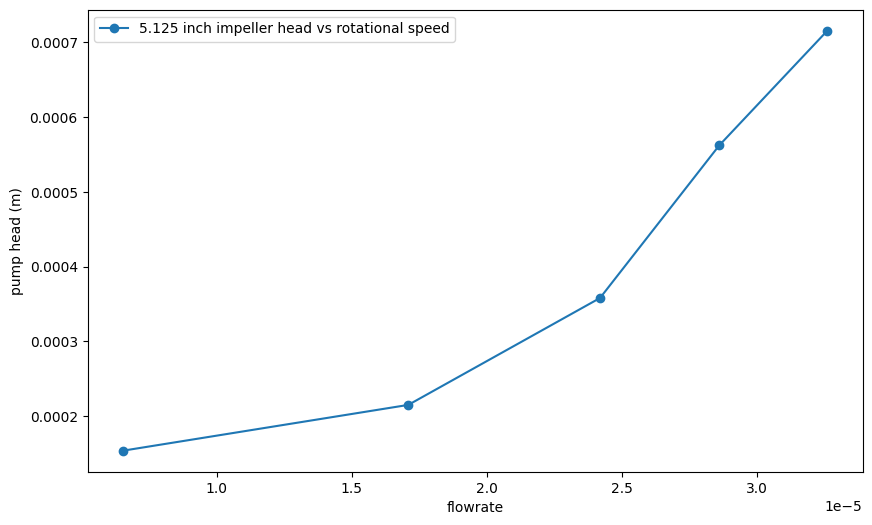

In [123]:
df_big = df.query("impeller_diam == 5.125")

plt.figure(figsize=(10,6))
plt.plot(df_big["volumetric_flowrate"], df_big["pump_head"], marker="o", label="5.125 inch impeller head vs rotational speed")
plt.xlabel("flowrate")
plt.ylabel("pump head (m)")
plt.legend()

Now, we have a good sense of the shape, it is best reprsented by the 5.125 inch impeller so we will use this going forward. Let's synthesize a quantitative relationship that describes effect of rotational speed on head. The relationship appears polynomial, so we can fit a polynomial regression to this line. 

In [124]:
impeller_size = 5.125
subset = df[df["impeller_diam"] == impeller_size]

X = subset[["ext_fpm"]].values  # Rotational speed (N)
y = subset["pump_head"].values  # Pump head (H)

In [125]:
X_quad = np.hstack((X, X**2))
model = LinearRegression()
model.fit(X_quad, y)

a, b = model.coef_[1], model.coef_[0]
c = model.intercept_

X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_quad = np.hstack((X_fit, X_fit**2))
y_fit = model.predict(X_fit_quad)


In [126]:
def cubic(N, a, b, c, d):
    return a * N**3 + b * N**2 + c * N + d

popt_cubic, _ = curve_fit(cubic, X.flatten(), y)
y_fit_cubic = cubic(X_fit.flatten(), *popt_cubic)


ADD ERROR BARS

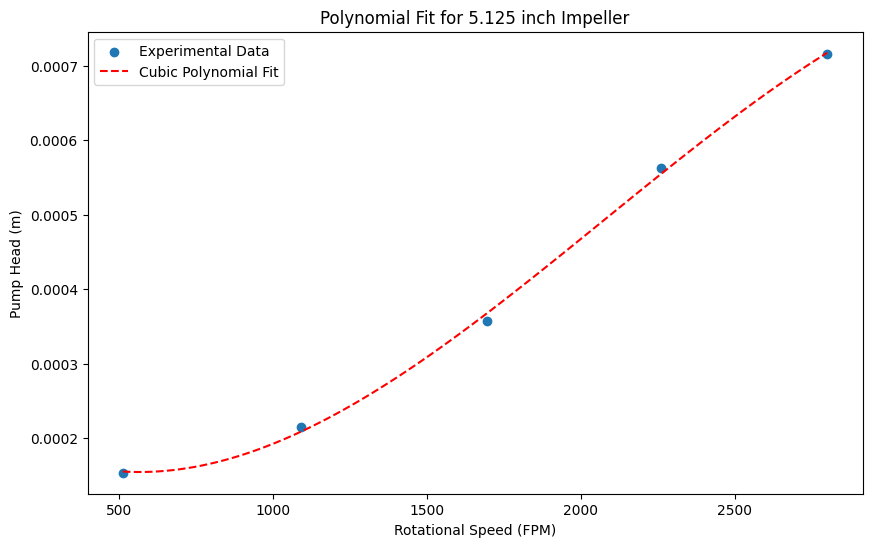

'Poly Fit Eqn = -4.948040e-14N³ + 3.076943e-10N² + -3.013540e-07N + 2.352954e-04'

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Experimental Data")
plt.plot(X_fit, y_fit_cubic, label="Cubic Polynomial Fit", color="red", linestyle="--")
plt.xlabel("Rotational Speed (FPM)")
plt.ylabel("Pump Head (m)")
plt.title(f"Polynomial Fit for {5.125} inch Impeller")
plt.legend()
plt.show()

cubic_eq = f"Poly Fit Eqn = {popt_cubic[0]:.6e}N³ + {popt_cubic[1]:.6e}N² + {popt_cubic[2]:.6e}N + {popt_cubic[3]:.6e}"

cubic_eq


So, we can synthesize a head(fpm) expression of 

$$
h(fpm) = -0.00000000192 fpm^{3} + 0.00000206 fpm^{2} -0.0000217 fpm + 0.00024
$$

## Analysis Question 2

$$ \textbf{Prepare a plot of head as a function of capacity for a single rpm.} $$

motor speed and RPM are analagous so we will partition our dataframe on 50 V motor speed

In [128]:
df_50 = df.query("motor_speed == 50")

Text(0, 0.5, 'pump head (m)')

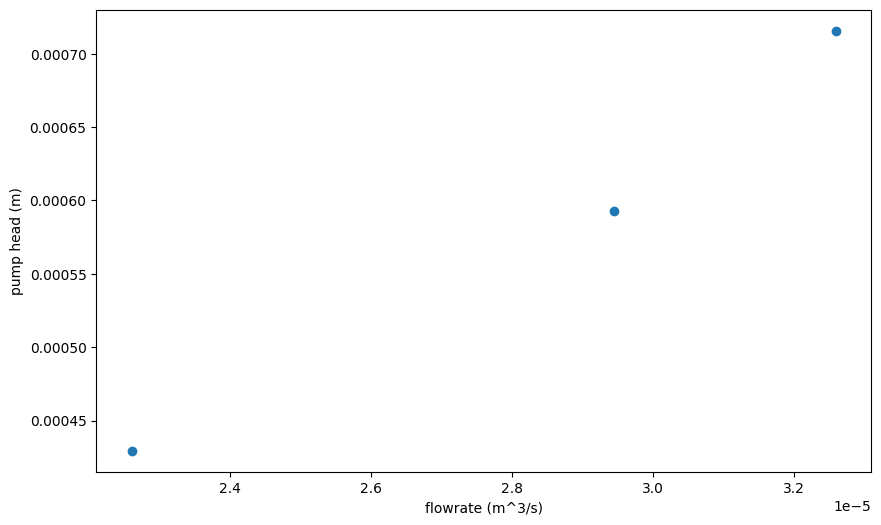

In [129]:
plt.figure(figsize=(10,6))
plt.scatter(df_50["volumetric_flowrate"], df_50["pump_head"], marker="o")
plt.xlabel("flowrate (m^3/s)")
plt.ylabel("pump head (m)")


Let's check the head-capacity relationship for all motor speeds

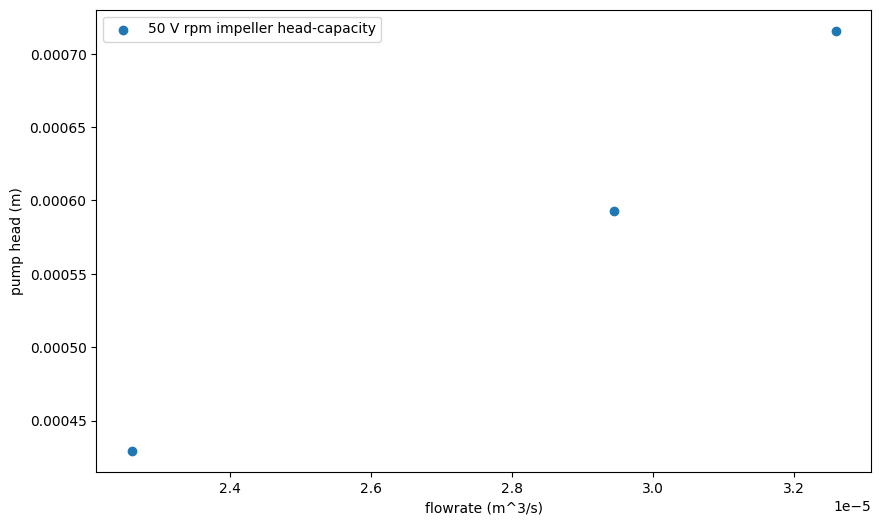

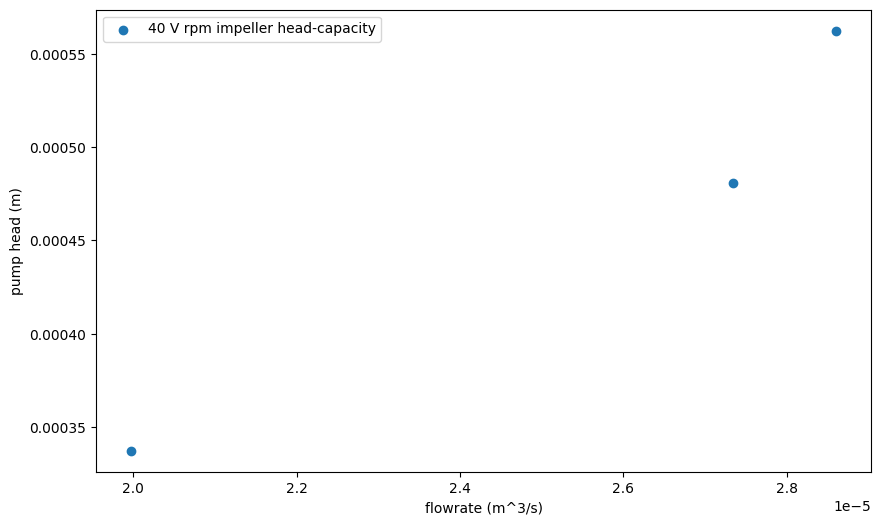

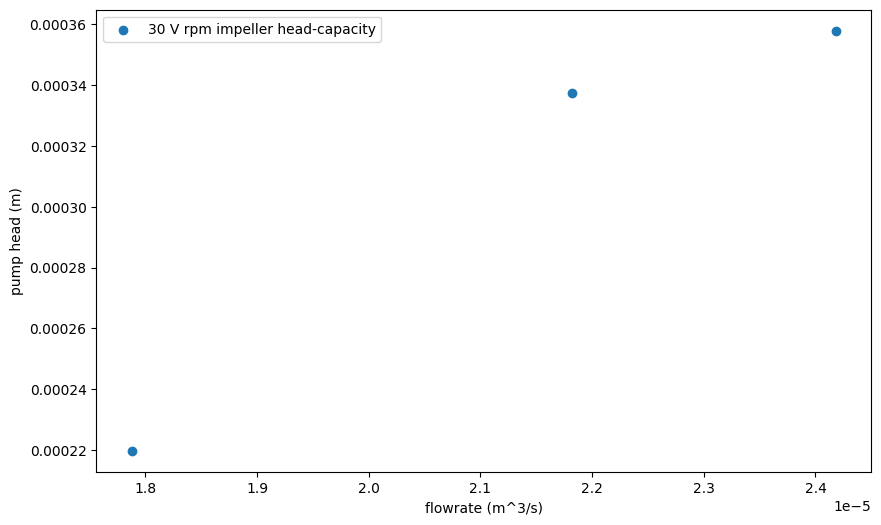

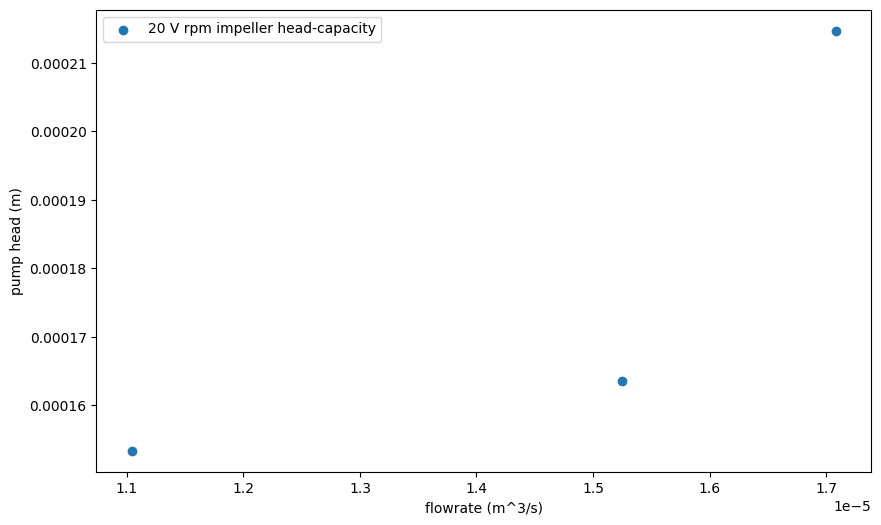

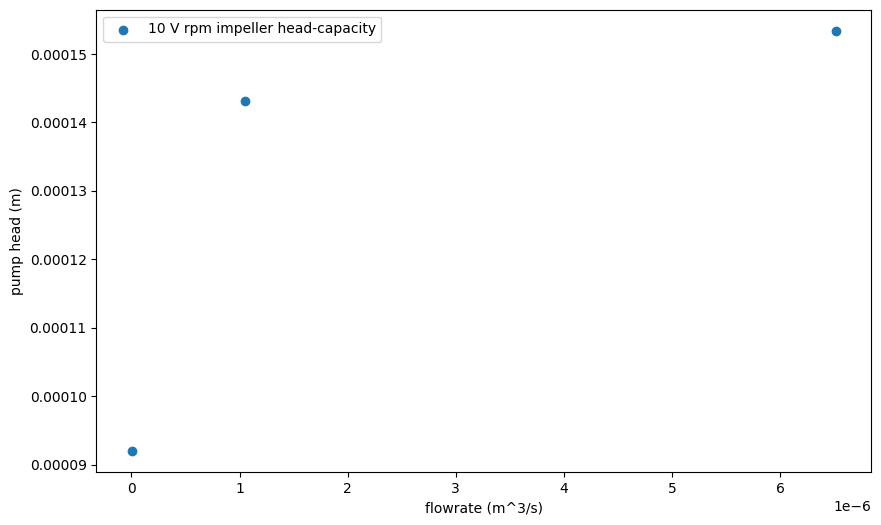

In [130]:
for speed in df["motor_speed"].unique():
    df_speed = df.query("motor_speed == @speed")
    plt.figure(figsize=(10,6))
    plt.scatter(df_speed["volumetric_flowrate"], df_speed["pump_head"], marker="o", label=f"{speed} V rpm impeller head-capacity")
    plt.legend()
    plt.xlabel("flowrate (m^3/s)")
    plt.ylabel("pump head (m)")
    plt.show()

Now let's vary this at different impeller diameters

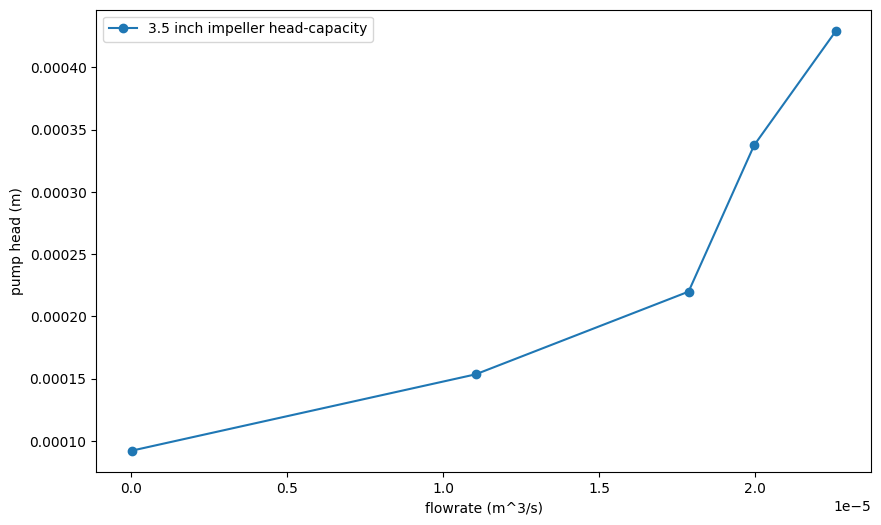

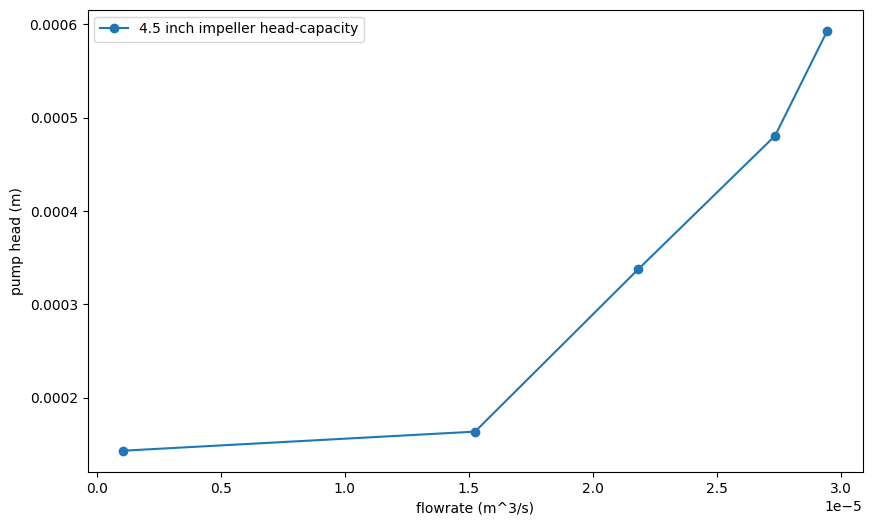

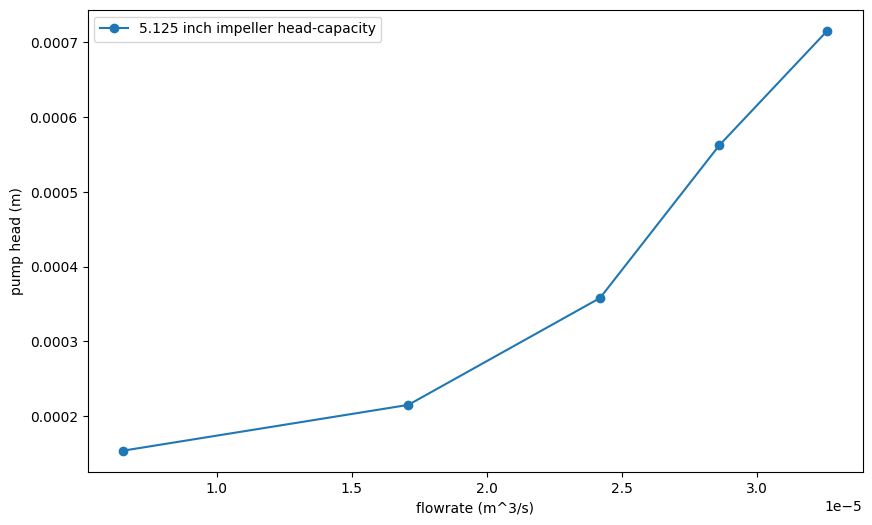

In [131]:
for diam in df["impeller_diam"].unique():
    df_diam = df.query("impeller_diam == @diam")
    plt.figure(figsize=(10,6))
    plt.plot(df_diam["volumetric_flowrate"], df_diam["pump_head"], marker="o", label=f"{diam} inch impeller head-capacity")
    plt.legend()
    plt.xlabel("flowrate (m^3/s)")
    plt.ylabel("pump head (m)")
    plt.show()


$$ \textbf{Describe qualitatively the effect of impeller diameter on the
head-capacity relationship. Can you describe this relationship quantitatively?}$$

Do this later

## Analysis Question 3
$$ \textbf{For the larger impeller at the highest speed, plot the
observed head versus capacity and the relationship predicted by the analysis of the
ideal pump.}$$

We start by finding the ideal pump head-capacity relationship which is given by the equation at (Noel de Nevers, 373)

(3.1):
$$ \Delta H_{ideal} = \frac{\omega ^ 2}{g} (r_3^2 - r_2 ^2) + \frac{V_1^2 - V_4^2}{2g}$$


we have all of these values except for u_2 which is the peripheral velocity, which is defined as:

(3.2):
$$ u_r = r_{impeller} \times \omega $$ 

So, we need to get angular velocity (omega) in rad/s using torque through the below relationship:

(3.3):
$$ \omega = \frac{2\pi (fpm)}{60}$$ 



In [132]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate,volumetric_flowrate,impeller_diam_meters,pump_head
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000,2.260725e-05,0.088900,0.000429
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000,1.997850e-05,0.088900,0.000337
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000,1.787550e-05,0.088900,0.000220
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000,1.104075e-05,0.088900,0.000153
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014,1.472100e-09,0.088900,0.000092
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000,2.944200e-05,0.114300,0.000593
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000,2.733900e-05,0.114300,0.000481
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500,2.181863e-05,0.114300,0.000337
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000,1.524675e-05,0.114300,0.000164
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000,1.051500e-06,0.114300,0.000143


In [133]:
int_diam = 0.5 * 0.0254 # inch to meters

In [134]:
df["angular_velocity"] = (2 * np.pi * df["ext_fpm"]) / 60 # rad /s # 3.3

In [135]:
#df["peripheral_velocity"] = df["angular_velocity_ext"] * (df["impeller_diam_meters"] / 2) # m/s # 3.2

In [136]:
# df["ideal_pump_head"] = ((df["angular_velocity_ext"] ** 2) / g) * (df["impeller_diam_meters"] ** 2 - int_diam ** 2) + (df["int_velocity"] ** 2 - df["peripheral_velocity"] ** 2)/(2*g)

In [137]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate,volumetric_flowrate,impeller_diam_meters,pump_head,angular_velocity
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000,2.260725e-05,0.088900,0.000429,304.504104
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000,1.997850e-05,0.088900,0.000337,242.688032
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000,1.787550e-05,0.088900,0.000220,179.898067
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000,1.104075e-05,0.088900,0.000153,117.307070
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014,1.472100e-09,0.088900,0.000092,54.370497
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000,2.944200e-05,0.114300,0.000593,290.073722
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000,2.733900e-05,0.114300,0.000481,235.828889
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500,2.181863e-05,0.114300,0.000337,175.248510
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000,1.524675e-05,0.114300,0.000164,112.552793
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000,1.051500e-06,0.114300,0.000143,51.082297


In [138]:
#for diam in df["impeller_diam"].unique():
    #df_diam = df.query("impeller_diam == @diam")    
    #plt.figure(figsize=(10,6))
    #plt.xlabel("flowrate (m^3/s)")
   # plt.ylabel("pump head (m)")
   # plt.plot(df_diam["volumetric_flowrate"], df_diam["ideal_pump_head"], marker="o", label="ideal pump head vs rotational speed")
   # plt.plot(df_diam["volumetric_flowrate"], df_diam["pump_head"], marker="o", label="experimental pump head vs rotational speed")
   # plt.legend()
   # plt.show()

THIS IS INCORRECT

### Analysis Question 4

$$ \textbf{For a single impeller size,
plot dimensionless head as a function of dimensionless flow for all speeds using the
non-dimensional groups of Streeter.} $$

From Streeter, we can see that the head coefficient is given by:
$$ \psi = \frac{gH}{\omega^2D^2} $$
and the dimensionless correlation for flow is given by:

$$ \phi = \frac{Q}{\omega D^3} $$


for H we will use the ideal H expression given as
$$ \Delta H_r = \frac{u_2(u_2-q_r/A_p tan \beta_2)}{g_c} $$

Let's add the angle data for each impeller from the lab manual

In [139]:
#impeller diameter has units of inches
#motor speed has units of volts
#ext fpm is rotations per minute
#field voltage has units of volts
#armature voltage has units of volts
#field current has units of miliAmperes
#armature current has units of amperes
#pump section pressure has units of psig
#pump discharge pressure has units of psig
#drive shaft torque has units of ft lbs
#flow rate has units of gallons per minute

sdf = df.iloc[:, :-3]
sdf

standard_df = sdf.copy()
standard_df['impeller_diam'] = standard_df['impeller_diam'] * 0.0254
standard_df['ext_fpm'] = standard_df['ext_fpm'] * 2 * np.pi / 60
standard_df['field_current'] = standard_df['field_current'] / 1000
standard_df['pump_suction_pressure'] = (standard_df['pump_suction_pressure'] + 14) * 6894.76
standard_df['pump_discharge_pressure'] = (standard_df['pump_discharge_pressure'] + 14) * 6894.76
standard_df['drive_shaft_torque'] = standard_df['drive_shaft_torque'] * 1.355818
standard_df['flowrate'] = standard_df['flowrate'] * 0.003785411784 / 60
standard_df


,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate,volumetric_flowrate
0,0.088900,50,304.504104,139,134,0.280,2.20,105489.828,134447.820,6.779090,1.356439e-03,2.260725e-05
1,0.088900,40,242.688032,139,107,0.280,1.89,108247.732,131000.440,4.338618,1.198714e-03,1.997850e-05
2,0.088900,30,179.898067,139,81,0.280,1.38,111005.636,125829.370,2.711636,1.072533e-03,1.787550e-05
3,0.088900,20,117.307070,138,54,0.280,1.10,113763.540,124105.680,1.355818,6.624471e-04,1.104075e-05
4,0.088900,10,54.370497,138,22,0.280,0.80,114453.016,120658.300,1.288027,8.832627e-08,1.472100e-09
5,0.114300,50,290.073722,140,130,0.300,3.60,103421.400,143411.008,14.236089,1.766525e-03,2.944200e-05
6,0.114300,40,235.828889,140,105,0.290,2.62,104110.876,136516.248,9.490726,1.640345e-03,2.733900e-05
7,0.114300,30,175.248510,140,80,0.290,1.90,108247.732,131000.440,5.423272,1.309122e-03,2.181863e-05
8,0.114300,20,112.552793,140,50,0.285,1.30,113074.064,124105.680,2.711636,9.148078e-04,1.524675e-05
9,0.114300,10,51.082297,140,25,0.285,1.00,114453.016,124105.680,1.355818,6.309020e-05,1.051500e-06


### Dimensions of the Impellers

In [140]:
data = {
    'impeller_diameter_inches': [3.5, 4.5, 5.125],  # Diameters in inches
    'impeller_width_cm': [0.4, 0.5, 0.5],  # Widths in cm
    'beta_degrees': [17, 20, 19],  # Beta angles in degrees
    'impeller_thickness': [0.01, 0.01, 0.0089]  # Thickness in meters
}

# Create the Pandas DataFrame
dims = pd.DataFrame(data)

# Convert inches to meters
dims['impeller_diameter_meters'] = dims['impeller_diameter_inches'] * 0.0254

# Convert cm to meters
dims['impeller_width_meters'] = dims['impeller_width_cm'] * 0.01

# Convert degrees to radians
dims['beta_radians'] = np.radians(dims['beta_degrees'])

dims = dims.iloc[:, 3:]
dims

,impeller_thickness,impeller_diameter_meters,impeller_width_meters,beta_radians
0,0.0100,0.088900,0.004,0.296706
1,0.0100,0.114300,0.005,0.349066
2,0.0089,0.130175,0.005,0.331613


In [141]:
def head_coefficient(g, H, omega, D):
    return (g * H) / (omega**2 * D**2)

def flow_coefficient(Q, omega, D):
    return Q / (omega * D**3)

def Delta_H(u_2, q_r, A_p, beta_2, g_c):
    return (u_2*(u_2 - (q_r/A_p) * np.tan(beta_2)))/(g_c)

def Peripheral_Area(D, width):
    return np.pi * D * width

In [142]:
g_c = 9.81 #m/s^2
dims['A_p'] = Peripheral_Area(dims['impeller_diameter_meters'],dims['impeller_width_meters'])

combined_df = pd.merge(standard_df, dims, how='inner', on=None, left_on='impeller_diam', right_on='impeller_diameter_meters')
combined_df

combined_df['u_2'] = (combined_df['impeller_diameter_meters'] / 2) * combined_df['ext_fpm']
combined_df['Delta_H'] = Delta_H(combined_df['u_2'],combined_df['flowrate'],combined_df['A_p'],combined_df['beta_radians'],g_c)
combined_df['flow_coefficient'] = flow_coefficient(combined_df['flowrate'], combined_df['ext_fpm'], combined_df['impeller_diameter_meters'])
combined_df['head_coefficient'] = head_coefficient(g_c, combined_df['Delta_H'], combined_df['ext_fpm'], combined_df['impeller_diameter_meters'])
combined_df


,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,...,volumetric_flowrate,impeller_thickness,impeller_diameter_meters,impeller_width_meters,beta_radians,A_p,u_2,Delta_H,flow_coefficient,head_coefficient
0,0.088900,50,304.504104,139,134,0.280,2.20,105489.828,134447.820,6.779090,...,2.260725e-05,0.0100,0.088900,0.004,0.296706,0.001117,13.535207,18.162828,0.006340,0.243143
1,0.088900,40,242.688032,139,107,0.280,1.89,108247.732,131000.440,4.338618,...,1.997850e-05,0.0100,0.088900,0.004,0.296706,0.001117,10.787483,11.501624,0.007030,0.242397
2,0.088900,30,179.898067,139,81,0.280,1.38,111005.636,125829.370,2.711636,...,1.787550e-05,0.0100,0.088900,0.004,0.296706,0.001117,7.996469,6.278939,0.008486,0.240823
3,0.088900,20,117.307070,138,54,0.280,1.10,113763.540,124105.680,1.355818,...,1.104075e-05,0.0100,0.088900,0.004,0.296706,0.001117,5.214299,2.675189,0.008038,0.241308
4,0.088900,10,54.370497,138,22,0.280,0.80,114453.016,120658.300,1.288027,...,1.472100e-09,0.0100,0.088900,0.004,0.296706,0.001117,2.416769,0.595383,0.000002,0.249997
5,0.114300,50,290.073722,140,130,0.300,3.60,103421.400,143411.008,14.236089,...,2.944200e-05,0.0100,0.114300,0.005,0.349066,0.001795,16.577713,27.409163,0.004078,0.244599
6,0.114300,40,235.828889,140,105,0.290,2.62,104110.876,136516.248,9.490726,...,2.733900e-05,0.0100,0.114300,0.005,0.349066,0.001795,13.477621,18.059583,0.004658,0.243832
7,0.114300,30,175.248510,140,80,0.290,1.90,108247.732,131000.440,5.423272,...,2.181863e-05,0.0100,0.114300,0.005,0.349066,0.001795,10.015452,9.954262,0.005002,0.243376
8,0.114300,20,112.552793,140,50,0.285,1.30,113074.064,124105.680,2.711636,...,1.524675e-05,0.0100,0.114300,0.005,0.349066,0.001795,6.432392,4.096103,0.005443,0.242792
9,0.114300,10,51.082297,140,25,0.285,1.00,114453.016,124105.680,1.355818,...,1.051500e-06,0.0100,0.114300,0.005,0.349066,0.001795,2.919353,0.864963,0.000827,0.248905


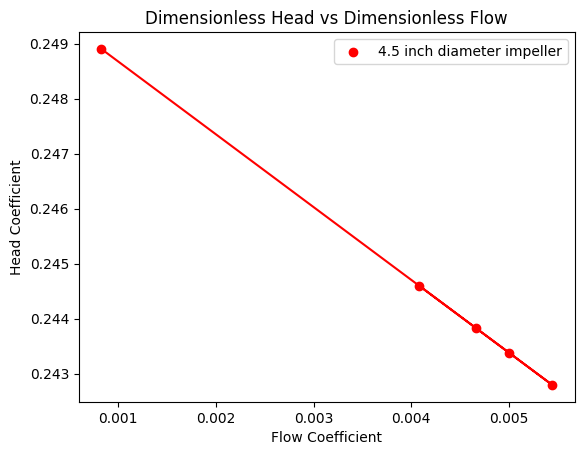

In [143]:
plt.scatter(combined_df['flow_coefficient'][5:10], combined_df['head_coefficient'][5:10], label='4.5 inch diameter impeller', color='red')
plt.plot(combined_df['flow_coefficient'][5:10], combined_df['head_coefficient'][5:10], color='red')
plt.title("Dimensionless Head vs Dimensionless Flow")
plt.xlabel("Flow Coefficient")
plt.ylabel("Head Coefficient")
plt.legend()

plt.show()

We can see that there is a negative correlation between head coefficient and flow coefficient. Slope of the line = $ \frac{d\psi}{d\phi}$. The rotational speed $(\omega)$ affects both the head and flow coefficients. Higher rotational speeds generally increase the head generated by the pump. However, the dimensionless coefficients normalize this effect, allowing for comparison across different speeds and impeller sizes.

## Analysis Question 5
For each speed, prepare a plot of dimensionless head as a function of dimensionless
capacity for different impeller sizes. This is usually not as productive. Identify data
points on this plot by the impeller size for which they were taken. Do you see three
distinct curves, one for each impeller? Is there a consistent effect of impeller diameter?

Note that impeller diameter is not the only length dimension that may be used to make
a group non-dimensional. Other possible characteristic lengths that may be important
include the thickness of the impeller, the clearance between the impeller and the
casing, or others. Each can be used to obtain a dimensionless group.

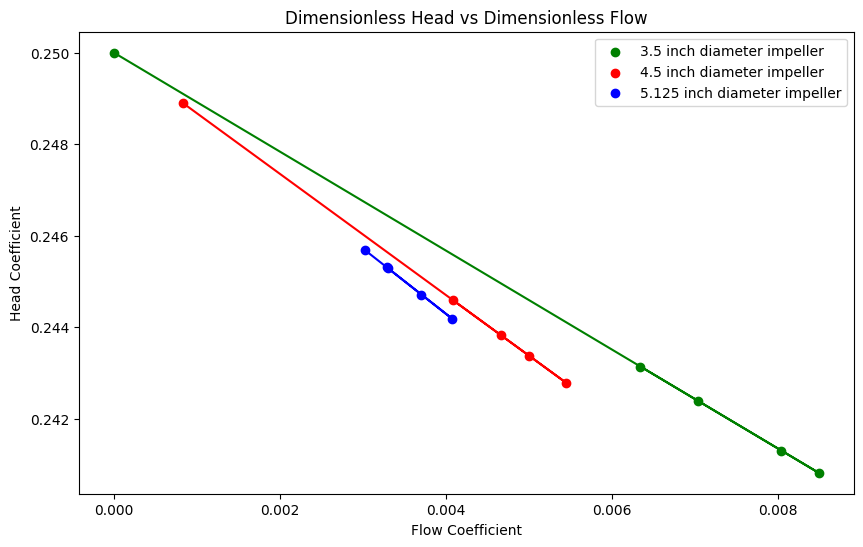

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(combined_df['flow_coefficient'][:5], combined_df['head_coefficient'][:5], label='3.5 inch diameter impeller', color='green')
plt.scatter(combined_df['flow_coefficient'][5:10], combined_df['head_coefficient'][5:10], label='4.5 inch diameter impeller', color='red')
plt.scatter(combined_df['flow_coefficient'][10:15], combined_df['head_coefficient'][10:15], label='5.125 inch diameter impeller', color='blue')
plt.plot(combined_df['flow_coefficient'][:5], combined_df['head_coefficient'][:5], color='green')
plt.plot(combined_df['flow_coefficient'][5:10], combined_df['head_coefficient'][5:10], color='red')
plt.plot(combined_df['flow_coefficient'][10:15], combined_df['head_coefficient'][10:15], color='blue')

plt.title("Dimensionless Head vs Dimensionless Flow")
plt.xlabel("Flow Coefficient")
plt.ylabel("Head Coefficient")
plt.legend()

plt.show()

The plot shows three distinct curves, each representing a different impeller size (3.5 inches, 4.5 inches, and 5.125 inches). All three curves show a negative correlation between the head coefficient and the flow coefficient. This means that as the flow coefficient increases, the head coefficient decreases for all impeller sizes.  The 3.5-inch impeller (green) has the highest head coefficients for a given flow coefficient, followed by the 4.5-inch (red) and the 5.125-inch (blue) impellers. This suggests that smaller impellers generate higher head coefficients at the same flow coefficient. The trend is consistent across all impeller sizes, indicating that the effect of impeller diameter on the head-capacity relationship is systematic. Smaller impellers tend to produce higher head coefficients, while larger impellers produce lower head coefficients for the same flow coefficient.

DO IN ORPT

### Using alternative charateristic lengths
Let us consider using impeller thickness as the characteristic length for the dimensionless groups.

In [147]:
combined_df['head_coefficient_alt'] = head_coefficient(g_c, combined_df['Delta_H'], combined_df['ext_fpm'], combined_df['impeller_thickness'])
combined_df['flow_coefficient_alt'] = flow_coefficient(combined_df['flowrate'], combined_df['ext_fpm'], combined_df['impeller_thickness'])
combined_df.head()

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,...,impeller_diameter_meters,impeller_width_meters,beta_radians,A_p,u_2,Delta_H,flow_coefficient,head_coefficient,head_coefficient_alt,flow_coefficient_alt
0,0.0889,50,304.504104,139,134,0.28,2.20,105489.828,134447.82,6.779090,...,0.0889,0.004,0.296706,0.001117,13.535207,18.162828,0.006340,0.243143,19.216141,4.454584
1,0.0889,40,242.688032,139,107,0.28,1.89,108247.732,131000.44,4.338618,...,0.0889,0.004,0.296706,0.001117,10.787483,11.501624,0.007030,0.242397,19.157175,4.939320
2,0.0889,30,179.898067,139,81,0.28,1.38,111005.636,125829.37,2.711636,...,0.0889,0.004,0.296706,0.001117,7.996469,6.278939,0.008486,0.240823,19.032782,5.961895
3,0.0889,20,117.307070,138,54,0.28,1.10,113763.540,124105.68,1.355818,...,0.0889,0.004,0.296706,0.001117,5.214299,2.675189,0.008038,0.241308,19.071073,5.647120
4,0.0889,10,54.370497,138,22,0.28,0.80,114453.016,120658.30,1.288027,...,0.0889,0.004,0.296706,0.001117,2.416769,0.595383,0.000002,0.249997,19.757827,0.001625


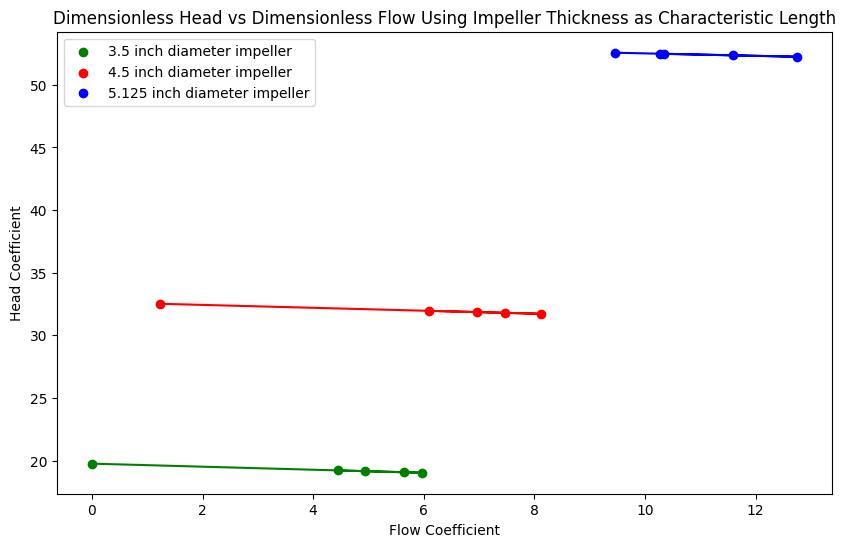

In [148]:
plt.figure(figsize=(10,6))
plt.scatter(combined_df['flow_coefficient_alt'][:5], combined_df['head_coefficient_alt'][:5], label='3.5 inch diameter impeller', color='green')
plt.scatter(combined_df['flow_coefficient_alt'][5:10], combined_df['head_coefficient_alt'][5:10], label='4.5 inch diameter impeller', color='red')
plt.scatter(combined_df['flow_coefficient_alt'][10:15], combined_df['head_coefficient_alt'][10:15], label='5.125 inch diameter impeller', color='blue')
plt.plot(combined_df['flow_coefficient_alt'][:5], combined_df['head_coefficient_alt'][:5], color='green')
plt.plot(combined_df['flow_coefficient_alt'][5:10], combined_df['head_coefficient_alt'][5:10], color='red')
plt.plot(combined_df['flow_coefficient_alt'][10:15], combined_df['head_coefficient_alt'][10:15], color='blue')

plt.title("Dimensionless Head vs Dimensionless Flow Using Impeller Thickness as Characteristic Length")
plt.xlabel("Flow Coefficient")
plt.ylabel("Head Coefficient")
plt.legend()

plt.show()

The curves for each impeller size are relatively flat, suggesting that the head coefficient does not change significantly with the flow coefficient when using impeller thickness as the characteristic length. The 5.125-inch impeller (blue) has the highest head coefficients, followed by the 4.5-inch (red) and the 3.5-inch (green) impellers. This suggests that larger impellers generate higher head coefficients when using impeller thickness as the characteristic length. Using impeller thickness as the characteristic length results in relatively flat curves, indicating that the head coefficient is less sensitive to changes in the flow coefficient. 

Compared to the previous plot using impeller diameter as the characteristic length, this plot shows less variation in the head coefficient with changes in the flow coefficient. This suggests that impeller diameter might be a more appropriate characteristic length for capturing the head-flow relationship in centrifugal pumps.